In [2]:
import seaborn
import pandas
import geopandas
import pysal
import mapclassify
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.lib import weights

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):
/opt/tljh/user/lib/python3.10/site-packages/spaghetti/network.py:40: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for 

In [3]:
!ls ~/data

385  geosnap  README.md  stanford-td754wr4701-geotiff.tiff
584  gtfs     shared	 uscountypcincome.gpkg


In [4]:
pci_df = geopandas.read_file("~/data/uscountypcincome.gpkg")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [5]:
pci_df.shape

(3076, 77)

In [6]:
pci_df.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2012,2013,2014,2015,2016,2017,index,IndustryCl,Descript_1,geometry
0,55,111,01581115,55111,Sauk,Sauk County,06,H1,G4020,357,...,39988,40655,42668,44255,44540,45847,NaN,None,None,"POLYGON ((-90.19196 43.55500, -90.31107 43.553..."
1,55,093,01581107,55093,Pierce,Pierce County,06,H1,G4020,378,...,39121,39367,41626,43539,43488,44636,NaN,None,None,"POLYGON ((-92.69454 44.68874, -92.73204 44.714..."
2,55,063,01581091,55063,La Crosse,La Crosse County,06,H1,G4020,None,...,41759,41230,43637,45067,45985,47134,NaN,None,None,"POLYGON ((-91.34774 43.91196, -91.42519 43.984..."
3,55,033,01581076,55033,Dunn,Dunn County,06,H1,G4020,232,...,35909,35940,36752,36835,37151,38345,NaN,None,None,"POLYGON ((-92.13538 44.94481, -92.15646 45.209..."
4,55,053,01581086,55053,Jackson,Jackson County,06,H1,G4020,None,...,39319,38620,40260,41189,41181,43185,NaN,None,None,"POLYGON ((-91.16601 44.33510, -91.16562 44.596..."


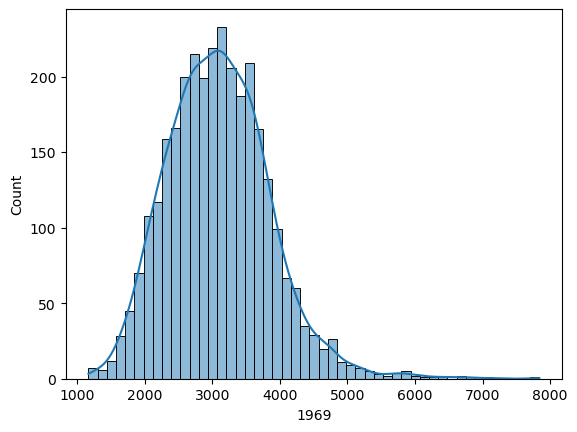

In [7]:
seaborn.histplot(x=pci_df['1969'], kde=True);

<Axes: >

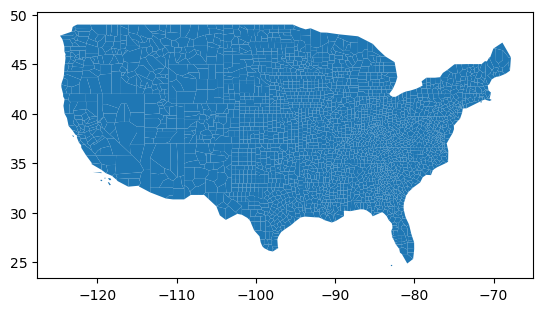

In [8]:
pci_df.plot()

In [9]:
pci_df = pci_df.to_crs(epsg=5070)

<Axes: >

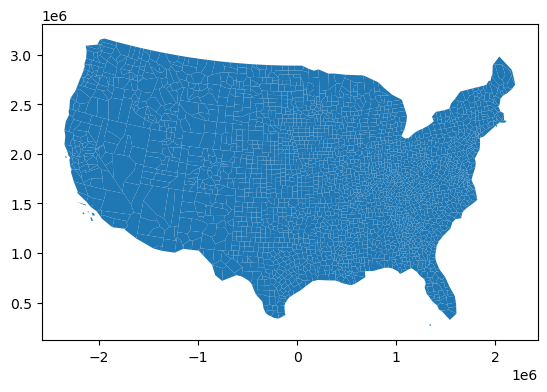

In [10]:
pci_df.plot()

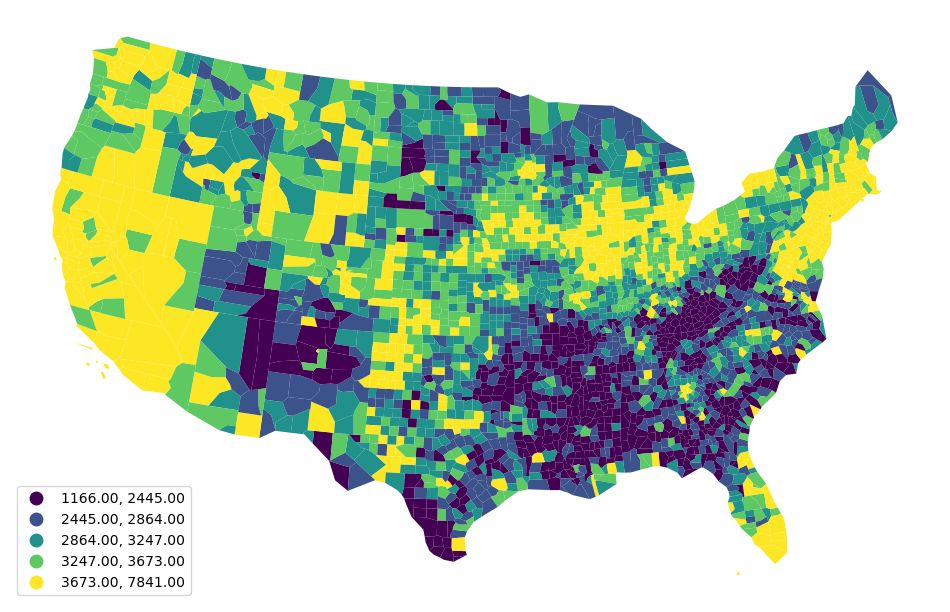

In [11]:
ax = pci_df.plot(
    column='1969',
    scheme='Quantiles',
    legend=True,
    edgecolor="none",
    legend_kwds={"loc": "lower left"},
    figsize=(12, 12),
)
ax.set_axis_off()
plt.show()

                 

In [12]:
top20, bottom20 = pci_df['1969'].quantile([0.8, 0.2])
top20 / bottom20

1.5022494887525562

In [13]:
top20, bottom20

(3673.0, 2445.0)

In [14]:
def ineq_20_20(values):
    top20, bottom20 = values.quantile([0.8, 0.2])
    return top20 / bottom20

In [17]:
import numpy
years = numpy.arange(1969, 2018).astype(str) 

In [18]:
years

array(['1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'], dtype='<U21')

In [20]:
ratio_2020 = pci_df[years].apply(ineq_20_20, axis=0)

In [21]:
ratio_2020.head()

1969    1.502249
1970    1.465717
1971    1.466783
1972    1.462504
1973    1.516387
dtype: float64

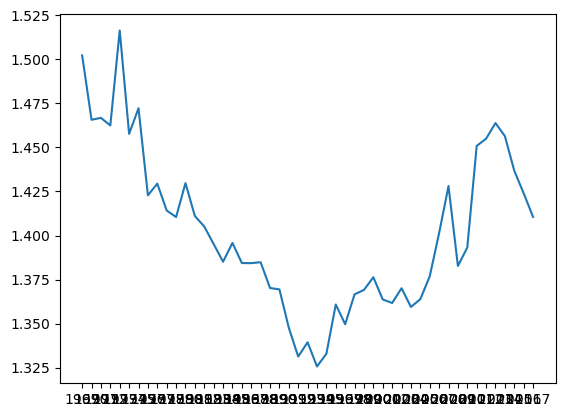

In [22]:
ax = plt.plot(years, ratio_2020)


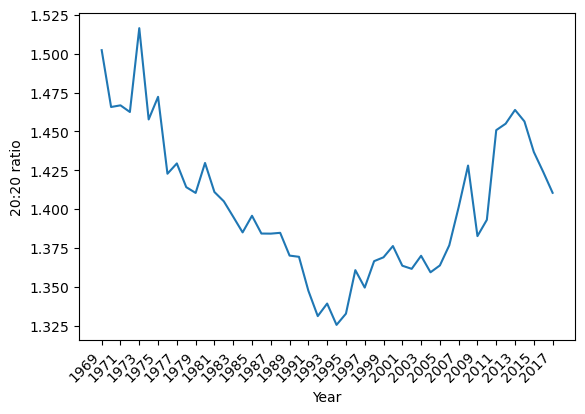

In [24]:
ax = plt.plot(years, ratio_2020)
figure = plt.gcf()
plt.xticks(years[::2])
plt.ylabel("20:20 ratio")
plt.xlabel('Year')
figure.autofmt_xdate(rotation=45)
plt.show()

In [25]:
from pysal.explore import inequality

In [26]:
n = len(pci_df)
n

3076

In [27]:
share_of_population = numpy.arange(1, n+1) / n

In [28]:
share_of_population[0:5]

array([0.0003251 , 0.0006502 , 0.00097529, 0.00130039, 0.00162549])

In [29]:
incomes = pci_df['1969'].sort_values()

In [30]:
shares = incomes / incomes.sum()

In [31]:
shares[0:5]

2647    0.000122
78      0.000130
2981    0.000131
1047    0.000132
973     0.000136
Name: 1969, dtype: float64

In [32]:
cumulative_share = shares.cumsum()

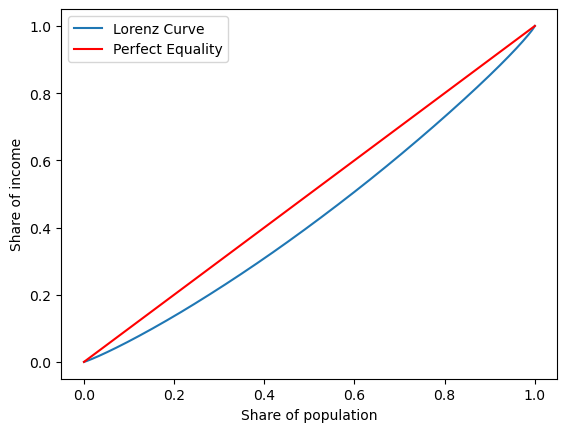

In [34]:
f, ax = plt.subplots()
ax. plot(share_of_population, cumulative_share, label='Lorenz Curve')
ax.plot((0,1), (0,1), color='r', label='Perfect Equality')
ax.set_xlabel("Share of population")
ax.set_ylabel("Share of income")
ax.legend()
plt.show()

In [35]:
g69 = inequality.gini.Gini(pci_df['1969'].values)
g69.g

0.13556175504269904

In [36]:
def gini_by_column(column):
    return inequality.gini.Gini(column.values).g


In [38]:
inequalities = (
    pci_df[years].apply(gini_by_column, axis=0).to_frame("gini")
)

In [39]:
inequalities.head()

,gini
1969,0.135562
1970,0.130076
1971,0.128540
1972,0.129126
1973,0.142166


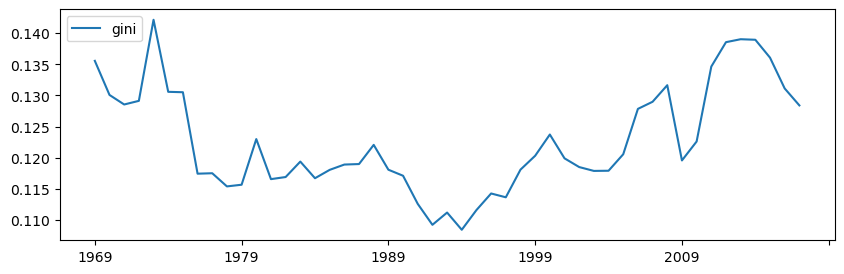

In [42]:
inequalities.plot(figsize=(10,3));

In [43]:
inequalities.head()

,gini
1969,0.135562
1970,0.130076
1971,0.128540
1972,0.129126
1973,0.142166


In [44]:
inequalities['20_20'] = ratio_2020

In [45]:
inequalities.head()

,gini,20_20
1969,0.135562,1.502249
1970,0.130076,1.465717
1971,0.128540,1.466783
1972,0.129126,1.462504
1973,0.142166,1.516387


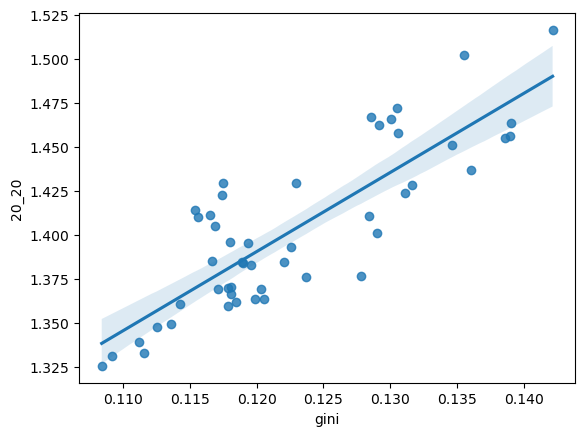

In [46]:
_ = seaborn.regplot(x='gini', y='20_20', data=inequalities)